In [39]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Read in the automobile data set from the UCI Machine Learning Repository and make some label changes for clarity
# Define the headers since the data does not have any

headers = ["symboling", "normalized_losses", "make", "fuel_type", "aspiration",
           "num_doors", "body_style", "drive_wheels", "engine_location",
           "wheel_base", "length", "width", "height", "curb_weight",
           "engine_type", "num_cylinders", "engine_size", "fuel_system",
           "bore", "stroke", "compression_ratio", "horsepower", "peak_rpm",
           "city_mpg", "highway_mpg", "price"]

In [4]:
# Read in the CSV file and convert "?" to NaN
df_raw = pd.read_csv("http://mlr.cs.umass.edu/ml/machine-learning-databases/autos/imports-85.data",
                     header=None, names=headers, na_values="?" )

In [5]:
print(df_raw.shape)
print(df_raw.columns)
df_raw.head()

(205, 26)
Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')


,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [6]:
# Define a list of models that we want to review

models = ["toyota","nissan","mazda", "honda", "mitsubishi", "subaru", "volkswagen", "volvo"]

In [11]:
# Create a copy of the data with only the top 8 manufacturers

df = df_raw[df_raw.make.isin(models)].copy(deep=True)

In [18]:
# Check if a deep copy has been done or not

df_raw is df, df_raw.index is df.index, df_raw.values is df.values, df_raw.columns is df.columns

(False, False, False, False)

In [61]:
print(df.shape)
print(df.columns)
df.head().T

(128, 26)
Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration',
       'num_doors', 'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type',
       'num_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg',
       'highway_mpg', 'price'],
      dtype='object')


,30,31,32,33,34
symboling,2,2,1,1,1
normalized_losses,137,137,101,101,101
make,honda,honda,honda,honda,honda
fuel_type,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
num_doors,two,two,two,two,two
body_style,hatchback,hatchback,hatchback,hatchback,hatchback
drive_wheels,fwd,fwd,fwd,fwd,fwd
engine_location,front,front,front,front,front
wheel_base,86.6,86.6,93.7,93.7,93.7


In [20]:
#How many different body styles these car makers made in 1985 (the year this dataset contains).

pd.crosstab(index=df.make, columns=df.body_style)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0,0,7,5,1
mazda,0,0,10,7,0
mitsubishi,0,0,9,4,0
nissan,0,1,5,9,3
subaru,0,0,3,5,4
toyota,1,3,14,10,4
volkswagen,1,0,1,9,1
volvo,0,0,0,8,3


In [46]:
#How many different body styles these car makers made
# use groupby
df.groupby(by='make')['body_style'].value_counts().unstack(level=-1).fillna(0).astype('int')

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0,0,7,5,1
mazda,0,0,10,7,0
mitsubishi,0,0,9,4,0
nissan,0,1,5,9,3
subaru,0,0,3,5,4
toyota,1,3,14,10,4
volkswagen,1,0,1,9,1
volvo,0,0,0,8,3


In [51]:
#How many different body styles these car makers made
# use df.pivot_table

df.pivot_table(index='make', columns='body_style', aggfunc= {'body_style':len}, fill_value=0)

body_style                              
body_style convertible hardtop hatchback sedan wagon
make                                                
honda                0       0         7     5     1
mazda                0       0        10     7     0
mitsubishi           0       0         9     4     0
nissan               0       1         5     9     3
subaru               0       0         3     5     4
toyota               1       3        14    10     4
volkswagen           1       0         1     9     1
volvo                0       0         0     8     3

In [52]:
#How many different body styles these car makers made
# use pd.pivot_table

pd.pivot_table(data=df,index='make', columns='body_style', aggfunc= {'body_style':len}, fill_value=0 )

body_style                              
body_style convertible hardtop hatchback sedan wagon
make                                                
honda                0       0         7     5     1
mazda                0       0        10     7     0
mitsubishi           0       0         9     4     0
nissan               0       1         5     9     3
subaru               0       0         3     5     4
toyota               1       3        14    10     4
volkswagen           1       0         1     9     1
volvo                0       0         0     8     3

In [54]:
pd.crosstab(index=df.make, columns=df.body_style, margins=True, margins_name='Total')

body_style,convertible,hardtop,hatchback,sedan,wagon,Total
make,,,,,,
honda,0,0,7,5,1,13
mazda,0,0,10,7,0,17
mitsubishi,0,0,9,4,0,13
nissan,0,1,5,9,3,18
subaru,0,0,3,5,4,12
toyota,1,3,14,10,4,32
volkswagen,1,0,1,9,1,12
volvo,0,0,0,8,3,11
Total,2,4,49,57,16,128


In [55]:
# The margins keyword instructed pandas to add a total for each row as well as a total at the bottom.
# The margins_name in the function call because is used to label the results “Total” instead of the default “All”.

pd.crosstab(index=df.make, columns=df.num_doors, margins=True, margins_name='Total')

num_doors,four,two,Total
make,,,
honda,5,8,13
mazda,7,9,16
mitsubishi,4,9,13
nissan,9,9,18
subaru,9,3,12
toyota,18,14,32
volkswagen,8,4,12
volvo,11,0,11
Total,71,56,127


In [60]:
#Added aggfunc as mean of values for values passed for the values parameter which is curb_weight
pd.crosstab(index=df.make, columns=df.body_style, values=df.curb_weight, aggfunc='mean', 
            margins=True, margins_name='Total').round(2)

body_style,convertible,hardtop,hatchback,sedan,wagon,Total
make,,,,,,
honda,NaN,NaN,1970.00,2288.80,2024.00,2096.77
mazda,NaN,NaN,2253.50,2361.14,NaN,2297.82
mitsubishi,NaN,NaN,2376.56,2394.00,NaN,2381.92
nissan,NaN,2008.00,2740.20,2237.89,2452.33,2400.39
subaru,NaN,NaN,2136.67,2314.00,2453.75,2316.25
toyota,2975.0,2585.00,2369.93,2337.50,2707.75,2441.09
volkswagen,2254.0,NaN,2221.00,2342.22,2563.00,2343.17
volvo,NaN,NaN,NaN,3023.00,3077.67,3037.91
Total,2614.5,2440.75,2310.71,2419.26,2613.94,2405.77


In [68]:
pd.crosstab(index=df.make, columns=df.body_style, values=df.length, aggfunc='mean', 
            margins=True, margins_name='Total', dropna=True).round(2)

body_style,convertible,hardtop,hatchback,sedan,wagon,Total
make,,,,,,
honda,NaN,NaN,153.46,171.74,157.10,160.77
mazda,NaN,NaN,168.67,173.86,NaN,170.81
mitsubishi,NaN,NaN,166.09,172.40,NaN,168.03
nissan,NaN,162.40,171.78,170.17,175.00,170.99
subaru,NaN,NaN,157.37,172.00,173.55,168.86
toyota,176.20,176.20,170.21,171.72,174.22,171.93
volkswagen,159.30,NaN,165.70,173.59,183.10,172.53
volvo,NaN,NaN,NaN,188.80,188.80,188.80
Total,167.75,172.75,166.03,174.50,176.42,171.34


In [70]:
#Normalize : used to find conditional probability
#Normalize on all values
pd.crosstab(index=df.make, columns=df.body_style, normalize=True)

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.000000,0.000000,0.054688,0.039062,0.007812
mazda,0.000000,0.000000,0.078125,0.054688,0.000000
mitsubishi,0.000000,0.000000,0.070312,0.031250,0.000000
nissan,0.000000,0.007812,0.039062,0.070312,0.023438
subaru,0.000000,0.000000,0.023438,0.039062,0.031250
toyota,0.007812,0.023438,0.109375,0.078125,0.031250
volkswagen,0.007812,0.000000,0.007812,0.070312,0.007812
volvo,0.000000,0.000000,0.000000,0.062500,0.023438


In [72]:
#Normalize on all columns

#pd.crosstab(index=df.make, columns=df.body_style, normalize=1) # P(body_style|make) ; sum of cols =1
pd.crosstab(index=df.make, columns=df.body_style, normalize='columns') # P(body_style|make) ; sum of cols =1

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.0,0.00,0.142857,0.087719,0.0625
mazda,0.0,0.00,0.204082,0.122807,0.0000
mitsubishi,0.0,0.00,0.183673,0.070175,0.0000
nissan,0.0,0.25,0.102041,0.157895,0.1875
subaru,0.0,0.00,0.061224,0.087719,0.2500
toyota,0.5,0.75,0.285714,0.175439,0.2500
volkswagen,0.5,0.00,0.020408,0.157895,0.0625
volvo,0.0,0.00,0.000000,0.140351,0.1875


In [74]:
#Normalize on all rows

#pd.crosstab(index=df.make, columns=df.body_style, normalize=0) # P(make|body_style) ; sum of rows =1
pd.crosstab(index=df.make, columns=df.body_style, normalize='index') # P(make|body_style) ; sum of rows =1

body_style,convertible,hardtop,hatchback,sedan,wagon
make,,,,,
honda,0.000000,0.000000,0.538462,0.384615,0.076923
mazda,0.000000,0.000000,0.588235,0.411765,0.000000
mitsubishi,0.000000,0.000000,0.692308,0.307692,0.000000
nissan,0.000000,0.055556,0.277778,0.500000,0.166667
subaru,0.000000,0.000000,0.250000,0.416667,0.333333
toyota,0.031250,0.093750,0.437500,0.312500,0.125000
volkswagen,0.083333,0.000000,0.083333,0.750000,0.083333
volvo,0.000000,0.000000,0.000000,0.727273,0.272727


- Grouping
- One of the most useful features of the crosstab is that you can pass in multiple dataframe columns and pandas does all the grouping for you. 
- For instance, if we want to see how the data is distributed by front wheel drive (fwd) and rear wheel drive (rwd), we can include the drive_wheels column by including it in the list of valid columns in the second argument to the crosstab

In [75]:
#grouping on columns
pd.crosstab(index=df.make, columns = [df.body_style, df.drive_wheels])

body_style   convertible     hardtop     hatchback         sedan          \
drive_wheels         fwd rwd     fwd rwd       4wd fwd rwd   4wd fwd rwd   
make                                                                       
honda                  0   0       0   0         0   7   0     0   5   0   
mazda                  0   0       0   0         0   6   4     0   5   2   
mitsubishi             0   0       0   0         0   9   0     0   4   0   
nissan                 0   0       1   0         0   2   3     0   9   0   
subaru                 0   0       0   0         1   2   0     2   3   0   
toyota                 0   1       0   3         0   8   6     0   7   3   
volkswagen             1   0       0   0         0   1   0     0   9   0   
volvo                  0   0       0   0         0   0   0     0   0   8   

body_style   wagon          
drive_wheels   4wd fwd rwd  
make                        
honda            0   1   0  
mazda            0   0   0  
mitsubishi       0   0   0  
nissan           0   3   0  
subaru           2   2   0  
toyota           2   1   1  
volkswagen       0   1   0  
volvo            0   0   3

In [76]:
#grouping on index
pd.crosstab(index=[df.make, df.num_doors], columns=df.body_style)

body_style            convertible  hardtop  hatchback  sedan  wagon
make       num_doors                                               
honda      four                 0        0          0      4      1
           two                  0        0          7      1      0
mazda      four                 0        0          1      6      0
           two                  0        0          9      0      0
mitsubishi four                 0        0          0      4      0
           two                  0        0          9      0      0
nissan     four                 0        0          1      5      3
           two                  0        1          4      4      0
subaru     four                 0        0          0      5      4
           two                  0        0          3      0      0
toyota     four                 0        0          6      8      4
           two                  1        3          8      2      0
volkswagen four                 0        0          0      7      1
           two                  1        0          1      2      0
volvo      four                 0        0          0      8      3

In [81]:
#grouping on index and columns
pd.crosstab(index=[df.make, df.num_doors], columns=[df.body_style, df.drive_wheels],
           rownames =['Automobile company', 'Number of Doors'],
           colnames=['Body Style', 'Drive Type'],
           dropna=False)

Body Style                         convertible         hardtop          \
Drive Type                                 4wd fwd rwd     4wd fwd rwd   
Automobile company Number of Doors                                       
honda              four                      0   0   0       0   0   0   
                   two                       0   0   0       0   0   0   
mazda              four                      0   0   0       0   0   0   
                   two                       0   0   0       0   0   0   
mitsubishi         four                      0   0   0       0   0   0   
                   two                       0   0   0       0   0   0   
nissan             four                      0   0   0       0   0   0   
                   two                       0   0   0       0   1   0   
subaru             four                      0   0   0       0   0   0   
                   two                       0   0   0       0   0   0   
toyota             four                      0   0   0       0   0   0   
                   two                       0   0   1       0   0   3   
volkswagen         four                      0   0   0       0   0   0   
                   two                       0   1   0       0   0   0   
volvo              four                      0   0   0       0   0   0   
                   two                       0   0   0       0   0   0   

Body Style                         hatchback         sedan         wagon      \
Drive Type                               4wd fwd rwd   4wd fwd rwd   4wd fwd   
Automobile company Number of Doors                                             
honda              four                    0   0   0     0   4   0     0   1   
                   two                     0   7   0     0   1   0     0   0   
mazda              four                    0   1   0     0   4   2     0   0   
                   two                     0   5   4     0   0   0     0   0   
mitsubishi         four                    0   0   0     0   4   0     0   0   
                   two                     0   9   0     0   0   0     0   0   
nissan             four                    0   1   0     0   5   0     0   3   
                   two                     0   1   3     0   4   0     0   0   
subaru             four                    0   0   0     2   3   0     2   2   
                   two                     1   2   0     0   0   0     0   0   
toyota             four                    0   6   0     0   7   1     2   1   
                   two                     0   2   6     0   0   2     0   0   
volkswagen         four                    0   0   0     0   7   0     0   1   
                   two                     0   1   0     0   2   0     0   0   
volvo              four                    0   0   0     0   0   8     0   0   
                   two                     0   0   0     0   0   0     0   0   

Body Style                              
Drive Type                         rwd  
Automobile company Number of Doors      
honda              four              0  
                   two               0  
mazda              four              0  
                   two               0  
mitsubishi         four              0  
                   two               0  
nissan             four              0  
                   two               0  
subaru             four              0  
                   two               0  
toyota             four              1  
                   two               0  
volkswagen         four              0  
                   two               0  
volvo              four              3  
                   two               0

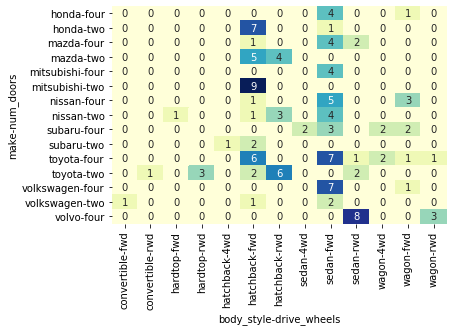

In [84]:
#Visualize usng Heatmap

ax=sns.heatmap(pd.crosstab([df.make, df.num_doors], [df.body_style, df.drive_wheels]),
            cmap="YlGnBu", annot=True, cbar=False)